Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Testfolder/data2


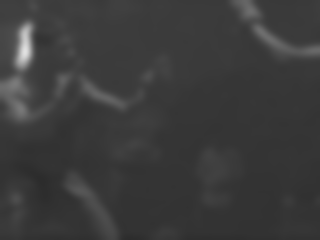

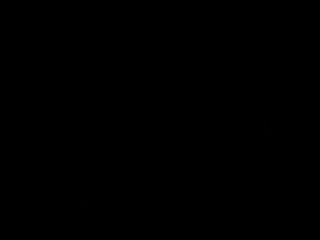

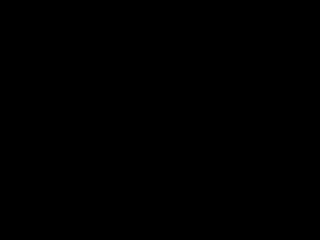

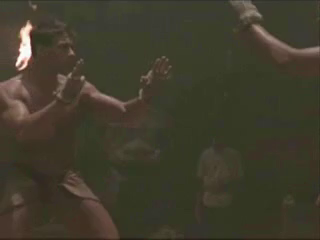

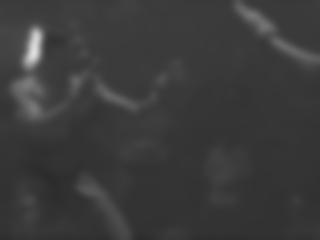

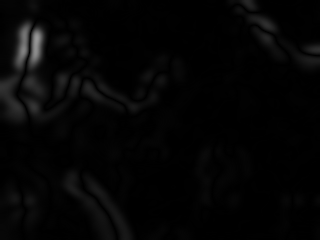

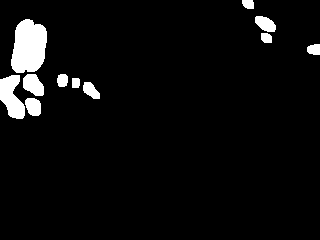

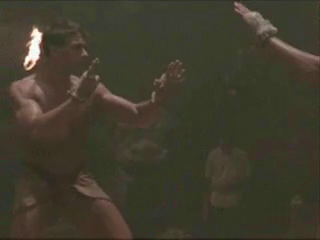

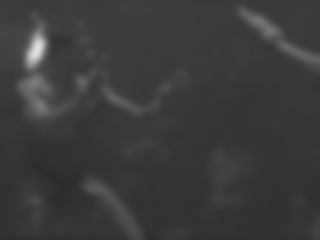

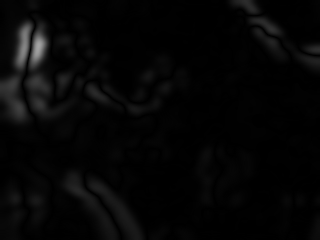

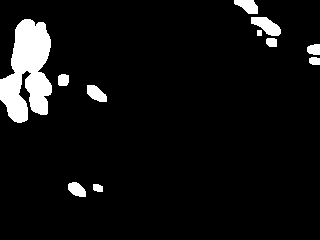

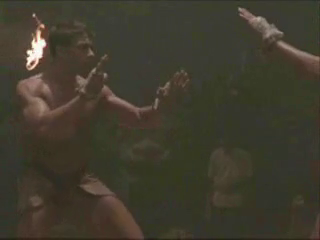

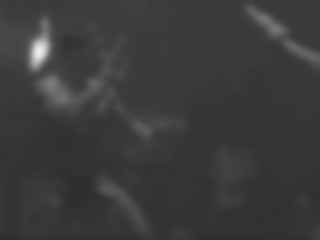

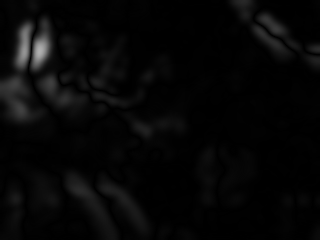

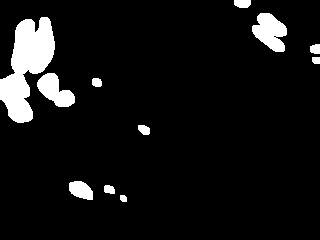

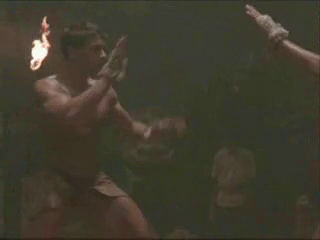

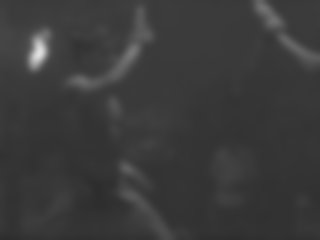

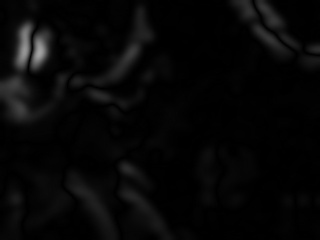

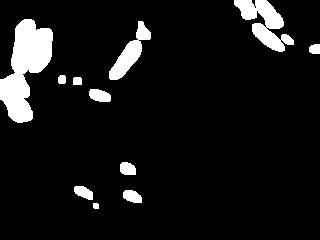

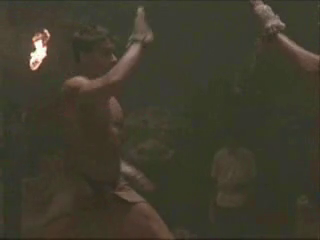

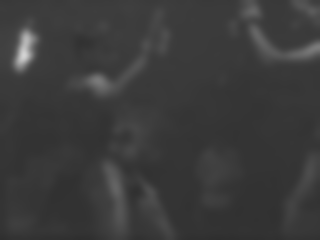

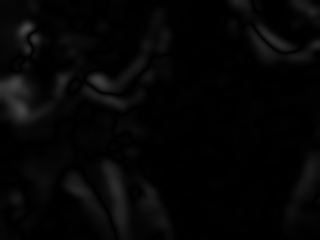

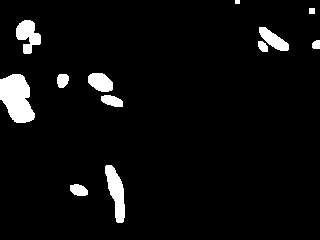

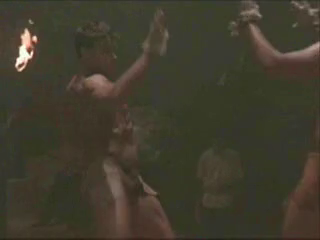

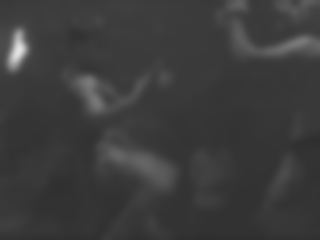

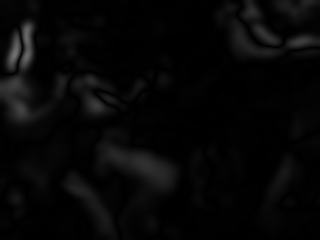

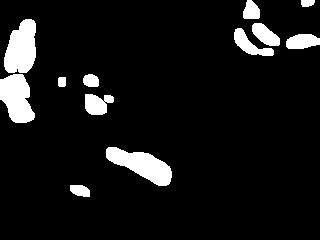

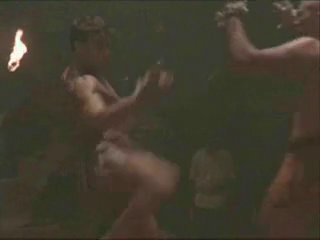

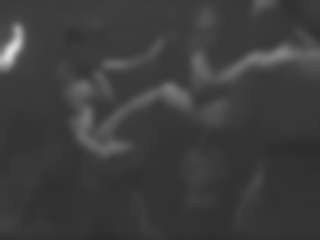

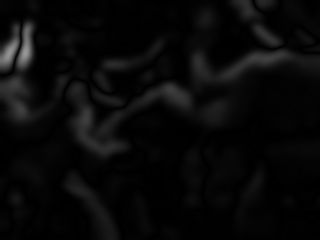

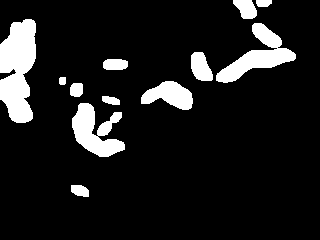

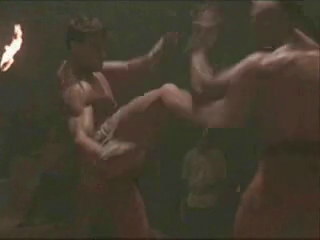

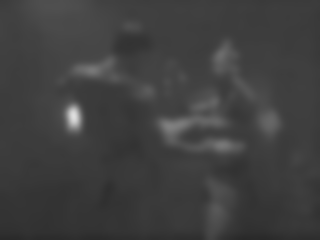

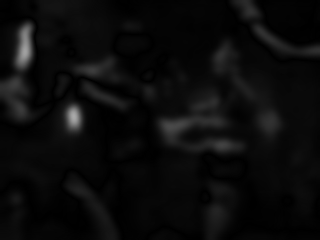

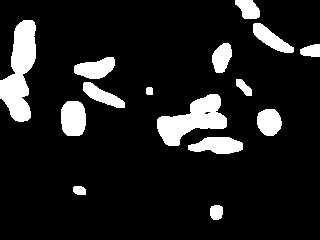

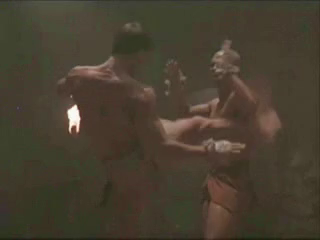

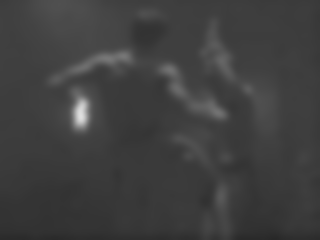

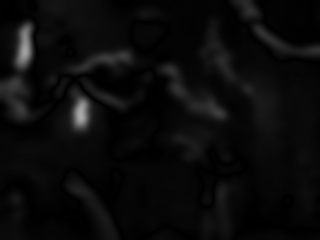

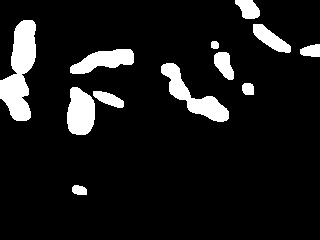

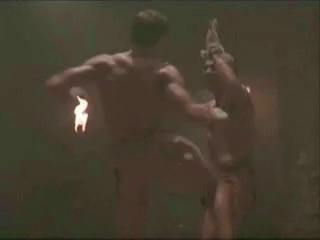

In [4]:
from pandas.core.internals.array_manager import NullArrayProxy
# Python program to implement Motion Detection on recorded videos

from google.colab.patches import cv2_imshow
import os
# importing OpenCV, time and Pandas library
import cv2, time, pandas
# importing datetime class from datetime library
from datetime import datetime
from google.colab import drive

drive.mount ('/content/drive')
%cd /content/drive/MyDrive/Testfolder/data2

# Assigning our static_back to None
static_back = None

# List when any moving object appear
motion_list = [ None, None ]

# Time of movement
time = []

# Initializing DataFrame, one column is start
# time and other column is end time
df = pandas.DataFrame(columns = ["Start", "End"])

#loop to run through the dataset video
for filename in os.listdir("/content/drive/MyDrive/Testfolder/data2"):
	# Capturing video
  video = cv2.VideoCapture(filename)

  # Infinite while loop to treat stack of image as video
  while True:
	  # Reading frame(image) from video
	  check, frame = video.read()
	 
	  if not check:
			 break
    
	  # Initializing motion = 0(no motion)
	  motion = 0

	  # Converting color image to gray_scale image
	  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

	  # Converting gray scale image to GaussianBlur
	  # so that change can be find easily
	  gray = cv2.GaussianBlur(gray, (21, 21), 0)
    
	  # In first iteration we assign the value
	  # of static_back to our first frame
	  if static_back is None:
		  static_back = gray
		  continue

	  # Difference between static background
	  # and current frame(which is GaussianBlur)
	  diff_frame = cv2.absdiff(static_back, gray)

	  # If change in between static background and
	  # current frame is greater than 30 it will show white color(255)
	  thresh_frame = cv2.threshold(diff_frame, 30, 255, cv2.THRESH_BINARY)[1]
	  thresh_frame = cv2.dilate(thresh_frame, None, iterations = 2)

	  # Finding contour of moving object
	  cnts,_ = cv2.findContours(thresh_frame.copy(),
		cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	  
    
	  for contour in cnts:
		  if cv2.contourArea(contour) < 10000:
			  continue
		  motion = 1

		  (x, y, w, h) = cv2.boundingRect(contour)
		  # making green rectangle around the moving object
		  cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 3)

	  # Appending status of motion
	  motion_list.append(motion)

	  motion_list = motion_list[-2:]

	  # Appending Start time of motion
	  if motion_list[-1] == 1 and motion_list[-2] == 0:
		  time.append(datetime.now())

	  # Appending End time of motion
	  if motion_list[-1] == 0 and motion_list[-2] == 1:
		  time.append(datetime.now())

	  # Displaying image in gray_scale
	  cv2_imshow(gray)

	  # Displaying the difference in currentframe to
	  # the staticframe(very first_frame)
	  cv2_imshow(diff_frame)

	  # Displaying the black and white image in which if
	  # intensity difference greater than 30 it will appear white
	  cv2_imshow(thresh_frame)

	  # Displaying color frame with contour of motion of object
	  cv2_imshow(frame)
	 
	  key = cv2.waitKey(1)
	  # if q entered whole process will stop
	  if key == ord('q'):
		  # if something is movingthen it append the end time of movement
		  if motion == 1:
			  time.append(datetime.now());
 
# Appending time of motion in DataFrame
for i in range(0 ,len(time), 2):
	  df = df.append({"Start":time[i], "End":time[i+1]}, ignore_index = True)

#Creating a CSV file in which time of movements will be saved
df.to_csv("Time_of_movements.csv")

video.release()

# Destroying all the windows
cv2.destroyAllWindows()
